In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import statistics as stat
import csv
import talib

## 1.  資料匯入

In [2]:
tickers = ['EWA', 'EWZ', 'EWC', 'FXI', 'EWQ', 'EWG', 'EWH', 'EWI', 'EWJ', 'EWY',
           'EWN', 'EWS', 'EZA', 'EWP', 'EWD', 'EWL', 'EWT', 'EWU', 'IVV']

In [3]:
data = pd.read_csv("data_all.csv", index_col=0 )
data.index = pd.to_datetime(data.index)
data.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,8.217886,14.126711,12.931461,13.237745,16.154015,13.303169,7.709301,31.728643,34.990158,23.648851,12.649429,7.995531,23.410761,19.021193,12.767601,12.915568,15.704612,20.224211,88.355942
2005-01-04,8.073186,13.520161,12.553794,12.872897,15.789632,13.037824,7.522993,31.005836,34.406452,23.001278,12.464212,7.859820,22.539045,18.658321,12.447660,12.509844,15.347388,19.853024,87.292419
2005-01-05,8.103125,13.402760,12.387615,12.580059,15.809880,13.044994,7.355958,31.167849,34.374020,23.157021,12.381896,8.006838,21.926809,18.555410,12.441620,12.509844,15.281234,19.864275,86.764305
2005-01-06,8.118093,13.285370,12.319633,12.594460,15.769397,13.052168,7.426626,31.142916,34.374020,22.771757,12.416193,8.153857,21.282505,18.642071,12.465767,12.524873,15.268003,19.853024,87.116364
2005-01-07,8.108113,13.467980,12.289425,12.481648,15.722158,12.966111,7.349532,30.818907,34.179440,22.706182,12.278999,8.040765,21.396206,18.241280,12.314852,12.284440,15.148928,19.875515,86.954994


In [4]:
returns = (data - data.shift(1)) / data.shift(1)
returns

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,-0.017608,-0.042936,-0.029205,-0.027561,-0.022557,-0.019946,-0.024167,-0.022781,-0.016682,-0.027383,-0.014642,-0.016973,-0.037236,-0.019077,-0.025059,-0.031414,-0.022746,-0.018354,-0.012037
2005-01-05,0.003708,-0.008683,-0.013237,-0.022748,0.001282,0.000550,-0.022203,0.005225,-0.000943,0.006771,-0.006604,0.018705,-0.027163,-0.005516,-0.000485,0.000000,-0.004310,0.000567,-0.006050
2005-01-06,0.001847,-0.008759,-0.005488,0.001145,-0.002561,0.000550,0.009607,-0.000800,0.000000,-0.016637,0.002770,0.018362,-0.029384,0.004670,0.001941,0.001201,-0.000866,-0.000566,0.004058
2005-01-07,-0.001229,0.013745,-0.002452,-0.008957,-0.002996,-0.006593,-0.010381,-0.010404,-0.005661,-0.002880,-0.011050,-0.013870,0.005342,-0.021499,-0.012106,-0.019196,-0.007799,0.001133,-0.001852
2005-01-10,0.004923,-0.005326,0.006146,0.008077,0.002146,-0.003319,0.007867,0.006470,0.007590,0.007581,-0.001117,0.012658,0.017850,0.007126,0.008823,0.006728,0.000000,0.000566,0.005062
2005-01-11,0.001225,-0.008277,0.010996,-0.008012,-0.007709,-0.008324,-0.011275,-0.016071,0.014124,0.018989,0.006152,0.002778,-0.004685,-0.005306,-0.005345,-0.003645,0.000000,-0.013575,-0.006798
2005-01-12,0.017125,0.011291,0.012084,0.012500,0.007337,0.005036,0.009649,0.020417,0.005571,0.004923,0.003335,0.002770,0.006456,0.012744,-0.009771,0.013415,0.004367,0.006881,0.003887
2005-01-13,-0.016235,0.011650,-0.000597,-0.005698,-0.004284,-0.011693,-0.001737,0.000400,-0.008310,0.009447,-0.005540,-0.006906,-0.024322,-0.000585,-0.010360,-0.010229,-0.017391,-0.010251,-0.008249


## 2. 兩種觀點下的long-short portfolio

### 技術指標1：14日RSI

In [5]:
from talib import abstract
print(abstract.STOCH)

STOCH([input_arrays], [fastk_period=5], [slowk_period=3], [slowk_matype=0], [slowd_period=3], [slowd_matype=0])

Stochastic (Momentum Indicators)

Inputs:
    prices: ['high', 'low', 'close']
Parameters:
    fastk_period: 5
    slowk_period: 3
    slowk_matype: 0
    slowd_period: 3
    slowd_matype: 0
Outputs:
    slowk
    slowd


In [6]:
high = pd.read_csv("high_all.csv", index_col=0 )
high.index = pd.to_datetime(high.index)

low = pd.read_csv("low_all.csv", index_col=0 )
low.index = pd.to_datetime(low.index)

close = pd.read_csv("data_close.csv", index_col=0 )
close.index = pd.to_datetime(close.index)

'''def etf2dict(etf):
    etf_dict = {
        'close': data[etf].dropna().astype(float),
        'high': high[etf].dropna().astype(float),
        'low': low[etf].dropna().astype(float),
    }
    return etf_dict


def talib2df(etf, talib_output):
    etf_dict = etf2dict(etf)
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else:
        ret = pd.Series(talib_output)
    ret.index = etf_dict['close'].index
    return ret;'''

In [7]:
def etf2pd(etf):
    etf_pd = pd.DataFrame(index=data.index)
    etf_pd["high"] = high[etf]
    etf_pd["low"] = low[etf]
    etf_pd["close"] = close[etf]
    return etf_pd

In [43]:
#K-D>0:買進；K-D<0:賣出
kd = pd.DataFrame()
for i in tickers:
    tmp_kd = abstract.STOCH(etf2pd(i), fastk_period=9, slowk_period=3,slowd_period=3, slowk_matype=1, slowd_matype=1).fillna(value=0).asfreq("BM")
    comp_kd = tmp_kd["slowk"] - tmp_kd["slowd"]   #series
    kd[i] = comp_kd
    
kd.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,0.175725,5.465792,4.230124,4.281049,7.130309,5.733630,8.479848,10.406760,2.478014,2.615992,7.377935,4.125048,8.366593,13.577897,2.224657,-0.908797,15.452739,4.469634,8.798938
2005-02-28,6.029803,-5.291486,-1.762845,3.264488,0.966364,0.970655,1.524276,13.202563,10.245899,-0.070434,-0.992855,-10.923278,-6.494707,-0.663064,-1.163441,2.367237,7.912500,-4.476322,6.895249
2005-03-31,0.808963,9.683318,12.777209,2.137086,1.813812,7.548524,4.983289,17.607011,1.054306,5.503065,3.339924,2.652561,9.245833,1.481727,5.554723,3.134090,10.151834,4.757061,10.149305
2005-04-29,1.478096,-10.242953,-7.887730,8.483881,0.408449,2.479582,5.106258,-1.953415,8.594607,-2.427691,5.588838,6.442147,-8.285784,3.163644,-6.984825,-8.243076,8.513771,-0.138286,6.562425
2005-05-31,-4.806353,-4.812727,0.956399,16.151334,-8.587559,-8.775688,14.926381,8.928415,3.765922,-6.657763,-18.134469,-0.869173,-7.406976,-17.651910,-14.007670,-7.246944,5.257066,-14.962895,-6.943061


In [44]:
k = pd.DataFrame()
for i in tickers:
    tmp_k = abstract.STOCH(etf2pd(i), fastk_period=9, slowk_period=3,slowd_period=3).fillna(value=0).asfreq("BM")["slowk"]
    k[i] = tmp_k
    
k

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,85.532075,81.013415,59.015542,81.570741,74.649000,40.666453,70.034920,53.719115,36.998008,76.639081,86.407811,80.044259,76.775915,80.139879,31.223488,49.629620,54.337871,86.805638,37.153904
2005-02-28,63.869730,86.526626,68.679701,92.231713,89.794250,77.262585,85.714323,73.972687,61.261308,88.587713,80.800962,29.725234,88.698251,52.124901,89.408037,99.543368,79.543143,78.839163,74.322131
2005-03-31,12.230181,31.289352,29.738537,12.643676,22.976998,28.294724,32.679786,50.829754,12.698449,26.165161,28.986818,16.666632,24.137931,19.991098,46.433594,15.462959,33.699885,23.167450,35.662406
2005-04-29,67.037733,48.245644,28.701346,73.347736,22.616826,13.957668,84.646965,6.034387,70.497066,28.770724,17.066835,81.996490,42.515007,14.674245,10.430621,18.326185,70.400407,22.365991,53.491008
2005-05-31,81.964581,88.255420,84.966457,70.379740,81.103062,81.755092,68.593716,56.724105,63.589674,70.337060,61.320547,44.504565,66.015729,42.762913,66.084686,72.566495,73.783179,60.051631,86.997069
2005-06-30,23.486832,71.332045,63.756681,85.422761,51.065165,25.754937,74.390425,72.187842,20.496909,13.566109,56.487260,29.411770,62.860348,45.196799,86.056475,32.438664,11.553050,32.225208,27.474663
2005-07-29,70.550327,72.569274,83.562812,98.220769,82.535270,88.741042,73.672094,86.032770,59.523777,85.230154,66.666531,79.873229,85.185441,85.591510,83.868333,79.938520,12.492937,89.431638,81.731509
2005-08-31,39.792292,92.668493,87.845710,27.888066,37.131492,41.464188,40.384625,50.702021,53.056936,17.377410,44.627462,26.949841,51.803571,37.688959,41.939042,35.419262,22.047687,45.612099,47.475433
2005-09-30,85.775811,94.379664,64.619891,74.724737,82.745396,84.161808,94.826690,89.893323,87.591652,28.266652,65.086281,59.064289,97.789298,85.835044,88.265383,70.253361,63.539267,33.760790,46.591887


### 定義函數：抓每個月RSI前四和後四檔的ETF 與 

In [45]:
def get_8_etf_kd(time):   #time: "y-m" ex."2005-1"   #output: 兩個list(long, short)
    temp_kd_set = kd[time]   #type: pd.dataframe
    temp_k_set = k[time]
    monthly_kd_set = []   #每個月的etf排名及其kd值
    for j in range(temp_kd_set.shape[1]):   #df行數
        if 20 < temp_k_set.iloc[0, j] < 80:
            etf_kd = [tickers[j], temp_kd_set.iloc[0, j]]
            monthly_kd_set.append(etf_kd)
    monthly_kd_set.sort(key=lambda x: x[1], reverse=True)
    #print(monthly_kd_set)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_kd_set[:4]]
    short_4_etf = [l[0] for l in monthly_kd_set[-4:]]
    return long_4_etf, short_4_etf

### 使用函數跑每月的資料（2005-1~2012-12)

In [46]:
weight_kd = pd.DataFrame(columns=tickers,index=kd.index).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_kd(time)
        for a in tmp_etf[0]:
            weight_kd.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_kd.loc[time, b] = -1

weight_kd

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,0,0,0,0,0,0,1,1,-1,-1,0,0,0,0,-1,-1,1,0,1
2005-02-28,0,0,-1,0,0,0,0,1,1,0,0,-1,0,-1,0,0,1,-1,1
2005-03-31,0,0,1,0,-1,0,-1,1,0,0,-1,0,0,0,0,0,1,-1,1
2005-04-29,0,-1,-1,1,0,0,0,0,1,-1,0,0,-1,0,0,0,1,0,1
2005-05-31,0,0,0,1,0,0,1,1,0,0,-1,0,0,-1,-1,0,1,-1,0
2005-06-30,0,0,-1,0,1,0,0,1,-1,0,0,0,1,1,0,0,0,-1,-1
2005-07-29,-1,1,0,0,0,0,-1,0,1,0,-1,-1,0,0,0,1,0,0,0
2005-08-31,0,0,0,-1,0,0,0,1,-1,0,1,-1,0,0,1,0,-1,1,0
2005-09-30,0,0,-1,0,0,0,0,0,0,-1,1,1,0,0,0,1,1,-1,-1


In [47]:
q_kd = []    #q1~q95
tmp_weight_kd = weight_kd.shift(1) #把前個月的權重換成下個月index，使ret_次月和weight_這個月配在一起
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            tmp_ret = returns[time].mean()    #series   #若沒有取mean,則為dataframe
            monthly_q_kd = float(tmp_weight_kd[time].dot(tmp_ret).to_numpy())
            q_kd.append(monthly_q_kd)
        else:
            pass
#print(q_kd)
print('KD mean:', stat.mean(q_kd))

KD mean: -0.0004470773307236165


<b/>以KD作為投資組合選擇指標，蒐集每月的報酬率（Rp_大 - Rp_小），則平均報酬率為-0.0969%。

### 技術指標2：移動平均線 MA

In [48]:
ma = pd.DataFrame()
for i in tickers:
    ma[i] = talib.EMA(data[i], timeperiod=20) - talib.EMA(data[i], timeperiod=35)
monthly_ma = ma.asfreq("BM")
monthly_ma

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,0.165789,0.710996,0.214852,0.262361,0.220052,0.107096,0.062265,0.257123,-0.015565,0.911264,0.262494,0.087266,0.442623,0.285084,0.077266,0.132683,0.287647,0.346943,0.509490
2005-03-31,0.024840,0.037608,0.107351,0.027806,0.077480,-0.002312,-0.005852,0.077411,-0.040513,0.172831,0.053499,0.000498,-0.158925,-0.012658,0.004822,0.017640,-0.076229,0.042247,-0.166971
2005-04-29,-0.054647,-0.103694,-0.089662,-0.036904,-0.087116,-0.115040,0.026100,-0.175466,-0.369404,-0.197246,-0.108030,-0.025036,-0.216620,-0.149013,-0.033454,-0.030672,-0.156466,-0.059400,-0.524676
2005-05-31,-0.025409,0.085923,-0.036388,-0.034329,-0.012839,-0.019787,0.027943,-0.176334,-0.229114,0.031243,-0.056347,0.020358,-0.166899,-0.049102,-0.012712,-0.020043,0.066212,-0.066361,0.325110
2005-06-30,0.092491,0.222084,0.177304,0.099398,0.004324,0.006350,0.061906,-0.105859,-0.044651,0.116890,0.036690,0.034388,-0.014548,-0.018774,-0.015875,-0.040058,0.160966,0.023612,0.352700
2005-07-29,0.070259,0.163163,0.233750,0.254892,0.167182,0.154876,0.136260,0.207494,0.009254,0.519665,0.092841,0.130835,0.388378,0.158084,0.114944,0.069833,0.116918,-0.002952,0.665717
2005-08-31,0.065930,0.294018,0.205716,0.169962,0.092404,0.115920,0.041533,0.123892,0.534507,0.190758,0.025822,0.022365,0.399052,0.096852,0.073019,0.081027,-0.121675,0.121494,0.017191
2005-09-30,0.124151,0.840771,0.287342,0.086164,0.070267,0.050095,0.044960,0.177778,0.855569,0.668632,0.012497,0.005889,0.527855,0.190850,0.073385,0.079563,-0.193823,0.115822,0.053599


若為正數，即表示當日短均線超過長均線，為看漲的股票；反之則看跌。

In [15]:
def get_8_etf_ma(time):   #time: "y-m" ex."2005-1"   #output: 兩個list(long, short)
    temp_ma_set = monthly_ma[time]   #type: pd.dataframe
    monthly_ma_set = []   #每個月的etf排名及其ma值
    for j in range(temp_ma_set.shape[1]):   #df行數
        etf_ma = [tickers[j], temp_ma_set.iloc[0, j]]   #ix: label or index searching
        monthly_ma_set.append(etf_ma)
    monthly_ma_set.sort(key=lambda x: x[1], reverse=True)
    #print(monthly_ma_set)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_ma_set[:4]]
    short_4_etf = [l[0] for l in monthly_ma_set[-4:]]
    return long_4_etf, short_4_etf

In [16]:
weight_ma = pd.DataFrame(columns=tickers,index=pd.date_range('2005/1/1','2019/12/31', freq='BM')).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_ma(time)
        for a in tmp_etf[0]:
            weight_ma.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_ma.loc[time, b] = -1

weight_ma

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2005-01-31,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
2005-02-28,0,1,0,0,0,-1,-1,0,-1,1,0,0,1,0,-1,0,0,0,1
2005-03-31,0,0,1,0,1,0,0,1,-1,1,0,0,-1,0,0,0,-1,0,-1
2005-04-29,0,0,0,1,0,0,1,-1,-1,0,0,1,-1,0,0,1,0,0,-1
2005-05-31,0,1,0,0,0,0,1,-1,-1,0,0,0,-1,0,0,0,1,-1,1
2005-06-30,0,1,1,0,0,0,0,-1,-1,0,0,0,0,-1,0,-1,1,0,1
2005-07-29,0,0,0,1,0,0,0,0,-1,1,-1,0,1,0,0,-1,0,-1,1
2005-08-31,0,1,1,0,0,0,0,0,1,0,-1,-1,1,0,0,0,-1,0,-1
2005-09-30,0,1,0,0,0,0,0,0,1,1,-1,-1,1,0,0,0,-1,0,-1
2005-10-31,0,1,0,-1,0,0,0,-1,1,0,0,0,0,1,0,1,-1,0,-1


In [40]:
q_ma = []    #q1~q95
tmp_weight_ma = weight_ma.shift(1)
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            tmp_ret = returns[time].mean()    #series   #若沒有取mean,則為dataframe
            monthly_q_ma = float(tmp_weight_ma[time].dot(tmp_ret).to_numpy())
            q_ma.append(monthly_q_ma)
        else:
            pass

print('MA mean:', stat.mean(q_ma))

MA mean: -0.0005740783162966586


<b/>以MA作為投資組合選擇的指標，蒐集每月的報酬率（Rp_大 - Rp_小），則平均報酬率為-0.0645%。

### 合併兩種view的估計資料

In [49]:
Q = np.array([
    [stat.mean(q_kd)],
    [stat.mean(q_ma)]
])
Q

array([[-0.00044708],
       [-0.00057408]])

In [50]:
#cov_mat = np.stack((q_rsi, q_ma), axis = 0)  
omega = np.cov(np.stack((q_kd, q_ma), axis = 0)  )
print(omega) 
print(type(omega))

[[ 2.91925369e-05 -5.64590371e-06]
 [-5.64590371e-06  4.30919488e-05]]
<class 'numpy.ndarray'>


<b> 帶入模型時，檢查tmp_weight_技術指標 會不會因shift影響到後面時段權重的計算

## 3. 代入Blacklitterman Model (period2： 2013/1/1~2019/12/31)

In [51]:
w_eq = np.array([
    [0.01797, 0.00554, 0.02888, 0.04935, 0.02994, 0.02390, 0.01081, 0.00598, 0.07510, 0.01466,
     0.01201, 0.00316, 0.00454, 0.00672, 0.00773, 0.03099, 0.01540, 0.04248, 0.61484]])
#每個月一個共變數矩陣sigma
tau = 0.05
delta = 3.37  #風險趨避係數
omega_inv = np.linalg.inv(omega)
#pi = ?

In [52]:
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_kd(time)
        for a in tmp_etf[0]:
            weight_kd.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_kd.loc[time, b] = -1

weight_kd

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,0,0,0,0,0,0,1,1,-1,-1,0,0,0,0,-1,-1,1,0,1
2005-02-28,0,0,-1,0,0,0,0,1,1,0,0,-1,0,-1,0,0,1,-1,1
2005-03-31,0,0,1,0,-1,0,-1,1,0,0,-1,0,0,0,0,0,1,-1,1
2005-04-29,0,-1,-1,1,0,0,0,0,1,-1,0,0,-1,0,0,0,1,0,1
2005-05-31,0,0,0,1,0,0,1,1,0,0,-1,0,0,-1,-1,0,1,-1,0
2005-06-30,0,0,-1,0,1,0,0,1,-1,0,0,0,1,1,0,0,0,-1,-1
2005-07-29,-1,1,0,0,0,0,-1,0,1,0,-1,-1,0,0,0,1,0,0,0
2005-08-31,0,0,0,-1,0,0,0,1,-1,0,1,-1,0,0,1,0,-1,1,0
2005-09-30,0,0,-1,0,0,0,0,0,0,-1,1,1,0,0,0,1,1,-1,-1


In [53]:
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_ma(time)
        for a in tmp_etf[0]:
            weight_ma.loc[time, a] = 1
        for b in tmp_etf[1]:
            weight_ma.loc[time, b] = -1

weight_ma

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2005-01-31,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
2005-02-28,0,1,0,0,0,-1,-1,0,-1,1,0,0,1,0,-1,0,0,0,1
2005-03-31,0,0,1,0,1,0,0,1,-1,1,0,0,-1,0,0,0,-1,0,-1
2005-04-29,0,0,0,1,0,0,1,-1,-1,0,0,1,-1,0,0,1,0,0,-1
2005-05-31,0,1,0,0,0,0,1,-1,-1,0,0,0,-1,0,0,0,1,-1,1
2005-06-30,0,1,1,0,0,0,0,-1,-1,0,0,0,0,-1,0,-1,1,0,1
2005-07-29,0,0,0,1,0,0,0,0,-1,1,-1,0,1,0,0,-1,0,-1,1
2005-08-31,0,1,1,0,0,0,0,0,1,0,-1,-1,1,0,0,0,-1,0,-1
2005-09-30,0,1,0,0,0,0,0,0,1,1,-1,-1,1,0,0,0,-1,0,-1
2005-10-31,0,1,0,-1,0,0,0,-1,1,0,0,0,0,1,0,1,-1,0,-1


### 每月求解w*

In [54]:
# 每個月的P矩陣
def get_p_matrix(time):
    view1 = weight_kd[time].values.tolist()[0]
    view2 = weight_ma[time].values.tolist()[0]
    p = np.stack([view1, view2])   #matrix:2x19，type:ndarray
    return p  

In [55]:
def get_optimal_weight(time):
    P = get_p_matrix(time)
    sigma = returns[time].cov()
    A = omega/tau + (P.dot(sigma).dot(np.transpose(P))/(1+tau))
    A_inv = np.linalg.inv(A)   #反矩陣
    lmda = (omega_inv.dot(Q)*tau/delta) - A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(w_eq)) \
    - (A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(P)).dot(omega_inv).dot(Q))*(tau/delta)
    optimal_w = (1/(1+tau))*(w_eq + np.transpose(np.transpose(P).dot(lmda)))
    return optimal_w

In [56]:
w_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        opt_w = get_optimal_weight(time)
        w_bl[time] = opt_w

w_bl

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,0.0171143,-0.0171502,0.254869,-0.430155,0.0285143,0.0227619,0.0102952,-0.0167311,0.0715238,0.263752,0.0114381,0.0254359,0.0267502,-0.0160264,0.0073619,0.0295143,0.037093,0.0404571,0.335771
2013-02-28,0.0171143,0.00527619,0.0275048,-0.0169491,0.0285143,0.0227619,-0.0465644,-0.00139424,0.0786133,0.0708215,0.0114381,0.0598691,0.0540939,-0.000689477,0.071311,0.0366038,0.0146667,-0.0164025,0.535792
2013-03-29,-0.126447,-0.138285,-0.116057,-0.0965614,0.0285143,0.0227619,0.0102952,0.00569524,0.0715238,0.0139619,0.0114381,0.00300952,0.00432381,0.0064,0.0073619,0.173076,0.158228,0.184019,0.729123
2013-04-30,0.0171143,0.0320634,-0.0138746,0.00562061,0.0285143,0.0227619,0.0102952,0.00569524,0.112903,-0.0274175,0.0114381,0.0443889,-0.0370556,0.0064,0.0073619,0.0708937,0.0146667,0.0404571,0.626941
2013-05-31,0.20873,0.196892,0.236645,0.238616,0.0460387,-0.186378,0.0102952,-0.39506,-0.120092,-0.195178,0.220578,0.00300952,0.195939,-0.20274,0.0073619,0.0295143,0.0146667,-0.151158,0.603086
2013-06-28,0.243674,0.0913375,0.254064,0.133061,-0.057547,-0.0632994,0.236855,0.00569524,-0.155036,-0.126536,-0.0746232,0.00300952,-0.136174,0.0064,0.0073619,0.256074,-0.211893,0.0404571,0.499501
2013-07-31,0.153157,0.141319,0.0998623,0.110685,-0.0351707,0.0227619,0.00162268,0.00569524,0.0715238,0.0139619,-0.124604,0.00300952,0.00432381,-0.057285,-0.0563231,-0.0428432,-0.0576909,0.112815,0.521877
2013-08-30,0.0171143,0.209681,0.0846935,-0.0430271,0.0285143,0.0227619,-0.0468935,-0.141521,0.21874,-0.133254,0.0114381,0.150225,0.00432381,-0.140816,0.0073619,0.0295143,-0.0425221,0.0976459,0.732778
2013-09-30,0.186865,-0.179583,0.0426136,0.047,0.0285143,-0.146989,0.364905,0.175446,-0.0982267,-0.170897,0.0114381,0.357619,-0.180536,-0.178459,0.0073619,0.0446232,0.199526,0.0404571,0.400703
2013-10-31,0.115921,-0.172659,0.0275048,0.126129,0.127321,0.0227619,0.0894241,-0.0931115,0.0715238,-0.163974,0.0114381,0.180945,-0.173612,-0.171536,0.284104,0.128321,0.0937955,0.0404571,0.407626


<b> 個別ETF報酬率比較

In [57]:
returns_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        r = np.array(returns[time].mean().values)
        w = w_bl[time].values
        tmp_ret_bl = r * w
        returns_bl[time] = tmp_ret_bl

returns_bl

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,3.14832e-05,-1.2518e-05,0.000203823,-0.000535174,4.29364e-05,4.44255e-05,2.17956e-05,-4.45162e-05,7.99243e-05,-0.00075767,3.18731e-05,7.59827e-06,-9.69928e-05,-2.92813e-05,2.12184e-05,9.71258e-05,-2.74518e-05,5.68544e-05,0.000804076
2013-02-28,2.67914e-05,-7.94195e-06,-3.24472e-05,5.46858e-05,-4.8254e-05,-4.71288e-05,1.91874e-05,9.30128e-06,0.000101948,0.000133974,-4.11402e-05,-2.37999e-05,-7.26845e-05,1.54665e-06,4.17401e-05,5.52068e-06,7.21137e-06,2.30375e-05,0.000397141
2013-03-29,-4.20421e-05,7.58039e-05,-6.12487e-05,0.000249644,-1.40453e-05,-8.17117e-06,-6.8974e-06,-1.43367e-05,0.000202733,-2.5517e-05,1.00224e-05,3.3211e-06,-1.79479e-06,-1.67994e-05,2.23197e-06,0.000185714,-0.000101114,0.000156773,0.00132523
2013-04-30,3.14652e-05,2.0968e-05,9.62816e-06,6.09468e-06,7.44986e-05,4.34398e-05,1.49393e-05,2.89136e-05,0.000423,1.83313e-05,1.80867e-05,6.95676e-05,-1.56693e-05,2.91256e-05,7.17529e-06,0.000126751,3.32606e-05,5.31894e-05,0.000577895
2013-05-31,-0.00131809,-0.000706704,-0.000105867,-0.000493511,4.16499e-05,-0.000229886,-1.72944e-05,-0.000246023,0.000404598,0.00011025,0.000267156,-8.79574e-06,-0.000748116,0.000280882,-3.7373e-06,-3.33326e-05,-1.68027e-05,4.23686e-06,0.000663128
2013-06-28,-0.000617514,-0.000577106,-0.000578613,-0.000480548,0.0001263,0.000119774,-0.00054723,-2.76126e-05,-0.00034642,0.000488095,0.000123201,-5.16402e-06,-6.81269e-05,-2.13684e-05,-2.09563e-05,-0.000188592,0.000242283,-9.11267e-05,-0.000369902
2013-07-31,0.000216216,-3.52565e-05,0.000253687,0.000275228,-0.000142456,6.67387e-05,3.26406e-06,2.53303e-05,5.16798e-06,3.20477e-05,-0.000545961,5.75017e-06,4.46296e-06,-0.000322468,-0.000270907,-8.08897e-05,-6.94902e-05,0.000321175,0.00125217
2013-08-30,8.08916e-06,-0.00021976,-3.10137e-05,-5.32764e-05,-2.62631e-05,-2.54199e-05,3.44478e-05,-3.52447e-05,-0.000300412,-0.000157876,-8.03357e-06,-0.000483572,-4.12164e-06,0.000152953,-1.14206e-05,-2.18182e-05,1.88153e-05,-3.07354e-05,-0.00101117
2013-09-30,0.00070113,-0.00112721,7.12912e-05,0.000131097,0.000108597,-0.000597812,0.00116577,0.000711361,-0.000460946,-0.00063134,3.20005e-05,0.00134062,-0.000768929,-0.00118318,2.61051e-05,0.000143502,0.000328608,0.000103715,0.000644715
2013-10-31,0.00027719,-0.000353672,4.40424e-05,7.86624e-05,0.000210045,5.3661e-05,6.58267e-05,-0.000428287,1.01515e-06,-0.000278951,2.51794e-05,0.000272073,-0.000295744,-0.000621931,-9.08462e-06,0.000168007,0.000176039,6.55802e-05,0.000811894


In [58]:
returns_eq = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        r = np.array(returns[time].mean().values)
        w = w_eq
        tmp_ret_eq = r * w
        returns_eq[time] = tmp_ret_eq

returns_eq

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,3.30574e-05,4.04367e-06,2.30959e-05,6.13985e-05,4.50832e-05,4.66468e-05,2.28854e-05,1.59109e-05,8.39205e-05,-4.21131e-05,3.34668e-05,9.43963e-07,-1.64615e-05,1.22779e-05,2.22793e-05,0.000101982,-1.13972e-05,5.96971e-05,0.00147237
2013-02-28,2.8131e-05,-8.33904e-06,-3.40696e-05,-0.000159227,-5.06667e-05,-4.94853e-05,-4.4544e-06,-3.98939e-05,9.73919e-05,2.77325e-05,-4.31972e-05,-1.2562e-06,-6.10027e-06,-1.50745e-05,4.52457e-06,4.67399e-06,7.57194e-06,-5.96638e-05,0.000455733
2013-03-29,5.97481e-06,-3.03687e-06,1.52414e-05,-0.000127587,-1.47476e-05,-8.57973e-06,-7.24227e-06,-1.50535e-05,0.00021287,-2.67928e-05,1.05236e-05,3.48715e-06,-1.88453e-06,-1.76393e-05,2.34357e-06,3.32529e-05,-9.84123e-06,3.61904e-05,0.00111752
2013-04-30,3.30385e-05,3.62291e-06,-2.0041e-05,5.35125e-05,7.82235e-05,4.56118e-05,1.56862e-05,3.03593e-05,0.000281368,-9.80167e-06,1.89911e-05,4.95244e-06,1.91979e-06,3.05819e-05,7.53405e-06,5.5407e-05,3.49236e-05,5.58489e-05,0.00056674
2013-05-31,-0.000113477,-1.98847e-05,-1.29199e-05,-0.000102067,2.70859e-05,2.94792e-05,-1.81591e-05,3.72403e-06,-0.000253017,-8.28101e-06,1.45461e-05,-9.23553e-06,-1.73342e-05,-9.3101e-06,-3.92417e-06,-3.49992e-05,-1.76428e-05,-1.19068e-06,0.000676052
2013-06-28,-4.55393e-05,-3.50039e-05,-6.57721e-05,-0.000178227,-6.57104e-05,-4.52232e-05,-2.49755e-05,-2.89932e-05,0.000167807,-5.65488e-05,-1.98282e-05,-5.42223e-06,2.27132e-06,-2.24369e-05,-2.20042e-05,-2.28234e-05,-1.76087e-05,-9.5683e-05,-0.000455316
2013-07-31,2.53688e-05,-1.38213e-06,7.3366e-05,0.000122713,0.00012127,7.00757e-05,2.17446e-05,2.65968e-05,5.42638e-06,3.365e-05,5.26224e-05,6.03768e-06,4.68611e-06,3.78281e-05,3.71804e-05,5.85103e-05,1.85497e-05,0.000120937,0.00147522
2013-08-30,8.49362e-06,-5.8063e-06,-1.05755e-05,6.11054e-05,-2.75763e-05,-2.66909e-05,-7.94099e-06,1.48927e-06,-0.000103141,1.73688e-05,-8.43525e-06,-1.0172e-05,-4.32773e-06,-7.29921e-06,-1.19917e-05,-2.29091e-05,-6.81423e-06,-1.33712e-05,-0.000848429
2013-09-30,6.74247e-05,3.47737e-05,4.83153e-05,0.000137651,0.000114026,9.72028e-05,3.4535e-05,2.42465e-05,0.00035242,5.41578e-05,3.36006e-05,1.1846e-05,1.93366e-05,4.45536e-05,2.74104e-05,9.96593e-05,2.53629e-05,0.0001089,0.000989253
2013-10-31,4.29698e-05,1.1348e-05,4.62445e-05,3.07779e-05,4.93929e-05,5.6344e-05,7.95744e-06,2.75064e-05,1.06591e-06,2.49395e-05,2.64384e-05,4.75145e-06,7.73381e-06,2.43645e-05,-2.47177e-07,4.05743e-05,2.89033e-05,6.88592e-05,0.00122461


## 4. 模型績效比較

<b> (1) 投資組合報酬率比較

In [59]:
port_ret_bl = returns_bl.sum(axis=1)   #列加總
port_ret_bl.head()

2013-01-31   -0.000060
2013-02-28    0.000549
2013-03-29    0.001920
2013-04-30    0.001571
2013-05-31   -0.002156
Freq: BM, dtype: float64

In [60]:
port_ret_eq = returns_eq.sum(axis=1)
port_ret_eq.head()

2013-01-31    0.001969
2013-02-28    0.000154
2013-03-29    0.001205
2013-04-30    0.001288
2013-05-31    0.000129
Freq: BM, dtype: float64

In [61]:
comparison_ret = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        comparison_ret.ix[time, 0] = port_ret_eq[time].values[0]   #type: ndarray
        comparison_ret.ix[time, 1] = port_ret_bl[time].values[0]
        if port_ret_eq[time].values[0] < port_ret_bl[time].values[0]:
            comparison_ret.ix[time, 2] = "Yes"
        else:
            comparison_ret.ix[time, 2] = "No"

comparison_ret

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/daphne/anaconda3/lib

,Equilibrium,BL Model,Outperform
2013-01,0.00196908,-6.04692e-05,No
2013-02,0.000154332,0.000548688,Yes
2013-03,0.001205,0.00191951,Yes
2013-04,0.00128848,0.00157066,Yes
2013-05,0.000129444,-0.00215626,No
2013-06,-0.00103704,-0.00284063,No
2013-07,0.0023104,0.000993811,No
2013-08,-0.00102702,-0.00220584,No
2013-09,0.00232468,0.000739084,No
2013-10,0.00172454,0.000261545,No


In [62]:
comparison_ret["Outperform"].value_counts()

No     69
Yes    15
Name: Outperform, dtype: int64

In [63]:
print("Equilibrium return:",comparison_ret["Equilibrium"].mean())
print("BL Model return:", comparison_ret["BL Model"].mean())

Equilibrium return: 0.00046338389865590836
BL Model return: -0.00031833246983737577


<b> (2) 投資組合波動率比較

<b> 投資組合波動率公式：var(p) = wa^2 * var(a) + wb^2 * var(b) + 2 * wa * wb * cov(a,b)
<br>matrix method： var(p) = w(1,19) * var-cov matrix(19,19) * w'(19,1)

In [64]:
volatility = pd.DataFrame(columns=tickers, index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        volatility[time] = returns[time].std().values[np.newaxis, :]   #增加dim from (19,)to (1,19)
        
volatility

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01,0.00596741,0.00771695,0.00612126,0.0110463,0.00845207,0.0093556,0.00768471,0.0124432,0.0106961,0.0105414,0.00813166,0.00668264,0.0111309,0.0129182,0.00821798,0.00708203,0.00859854,0.00614207,0.00599569
2013-02,0.0107598,0.00874238,0.00617933,0.0118932,0.020462,0.0145069,0.0080517,0.0235721,0.00966496,0.0102102,0.0150941,0.0071847,0.0116611,0.0255404,0.0163366,0.00926902,0.00684797,0.00903557,0.00822785
2013-03,0.00866959,0.00971951,0.00587527,0.0124783,0.0116018,0.0100319,0.00801381,0.0158436,0.00674413,0.00880123,0.00954407,0.00593137,0.0132733,0.015857,0.00928173,0.00918291,0.00806242,0.0070888,0.00465968
2013-04,0.0136241,0.0142923,0.0139389,0.0143062,0.0140983,0.0133919,0.0103721,0.0171615,0.01459,0.0151963,0.0112462,0.00786292,0.0190043,0.0159492,0.0134885,0.0106707,0.0121694,0.00893401,0.00883745
2013-05,0.0114967,0.0109612,0.00728689,0.0114165,0.00932888,0.00859073,0.00905215,0.0123317,0.0140395,0.0097833,0.00795478,0.00814947,0.0112326,0.0116169,0.00957737,0.00821504,0.00890038,0.0065256,0.0066557
2013-06,0.0194334,0.0163671,0.0122506,0.0175432,0.0141183,0.0133625,0.0166174,0.0147793,0.0248438,0.0173121,0.0123513,0.018466,0.0268239,0.0141538,0.018329,0.0110887,0.0157018,0.0109253,0.0110373
2013-07,0.0114343,0.0162113,0.00857873,0.0156107,0.00822681,0.009227,0.00966668,0.0124512,0.0123042,0.0145943,0.00648501,0.011629,0.0161375,0.0123231,0.00919041,0.00670007,0.013771,0.00708112,0.00473542
2013-08,0.00970088,0.0163548,0.00797283,0.0143525,0.00850054,0.00878614,0.0108011,0.0151161,0.011785,0.0110504,0.00891705,0.00776811,0.014672,0.0137425,0.010679,0.00769159,0.0112343,0.0072443,0.00664828
2013-09,0.0123426,0.0171514,0.00644791,0.0133864,0.00873503,0.00872488,0.010054,0.0120351,0.0123325,0.0138258,0.00794872,0.0104071,0.0177406,0.010647,0.0116702,0.00750355,0.00915341,0.0072987,0.00539975
2013-10,0.00959722,0.0103128,0.00589517,0.010453,0.00782575,0.00743544,0.00729048,0.0113077,0.0102921,0.00859136,0.00731954,0.00788558,0.0136547,0.0116897,0.0096289,0.00853557,0.00918221,0.00811917,0.00785539


In [65]:
#cov(assets) = sigma
comparison_vol = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1,13):
        time = str(y)+'-'+str(m)
        sigma = returns[time].cov()
        # variance
        tmp_bl = np.array(w_bl[time].values.dot(sigma).dot(np.transpose(w_bl[time])), dtype=np.float64)  #.values shape: (1,19) #outcome: (1,1)
        tmp_eq = w_eq.dot(sigma).dot(np.transpose(w_eq))
        # std
        comparison_vol.ix[time, 0] = np.sqrt(tmp_eq)[0][0]
        comparison_vol.ix[time, 1] = np.sqrt(tmp_bl)[0][0]  #float64才能使用sqrt
        if tmp_bl < tmp_eq:
            comparison_vol.ix[time, 2] = "Yes"
        else:
            comparison_vol.ix[time, 2] = "No"

comparison_vol

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Us

,Equilibrium,BL Model,Outperform
2013-01,0.0060346,0.00387839,Yes
2013-02,0.00834345,0.00832032,Yes
2013-03,0.0051432,0.00582323,No
2013-04,0.00924647,0.00835331,Yes
2013-05,0.00698819,0.00598091,Yes
2013-06,0.0122044,0.0110999,Yes
2013-07,0.00575922,0.00701894,No
2013-08,0.00687392,0.00731105,No
2013-09,0.00665314,0.00636323,Yes
2013-10,0.00721705,0.00683917,Yes


In [66]:
comparison_vol["Outperform"].value_counts()

No     52
Yes    32
Name: Outperform, dtype: int64

In [67]:
print("Equilitbrium Total Return:", comparison_vol["Equilibrium"].mean())
print("BL Model Total Return:", comparison_vol["BL Model"].mean())

Equilitbrium Total Return: 0.007427373147973562
BL Model Total Return: 0.00759768254749384


<b> (3) 投資組合Sharpe ratio比較

Sharpe = returns / volatility  (monthly calculated)

In [68]:
comparison_sharpe = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for y in range(2013, 2020):
    for m in range(1,13):
        time = str(y)+'-'+str(m)
        tmp_eq = comparison_ret.ix[time,0] / comparison_vol.ix[time,0]
        tmp_bl = comparison_ret.ix[time,1] / comparison_vol.ix[time,1]
        comparison_sharpe.ix[time, 0] = tmp_eq
        comparison_sharpe.ix[time, 1] = tmp_bl
        if tmp_bl > tmp_eq:
            comparison_sharpe.ix[time, 2] = "Yes"
        else:
            comparison_sharpe.ix[time, 2] = "No"
        
comparison_sharpe

/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/daphne/anaconda3/lib/python3.7/site-packages/ipykernel_launche

,Equilibrium,BL Model,Outperform
2013-01,0.326299,-0.0155913,No
2013-02,0.0184973,0.0659456,Yes
2013-03,0.234289,0.32963,Yes
2013-04,0.139348,0.188029,Yes
2013-05,0.0185232,-0.360524,No
2013-06,-0.0849722,-0.255914,No
2013-07,0.401166,0.14159,No
2013-08,-0.149409,-0.301712,No
2013-09,0.34941,0.116149,No
2013-10,0.238953,0.0382422,No


In [69]:
comparison_sharpe["Outperform"].value_counts()

No     71
Yes    13
Name: Outperform, dtype: int64

## 〈結論〉

綜合以上從月報酬率、標準差、Sharpe ratio的比較，可以看出Blacklitterman Model下調整的權重大約有5%的機會打敗Equilibrium portfolio。

1. 日報酬率 (2009/1/1 ~ 2019/12/31)

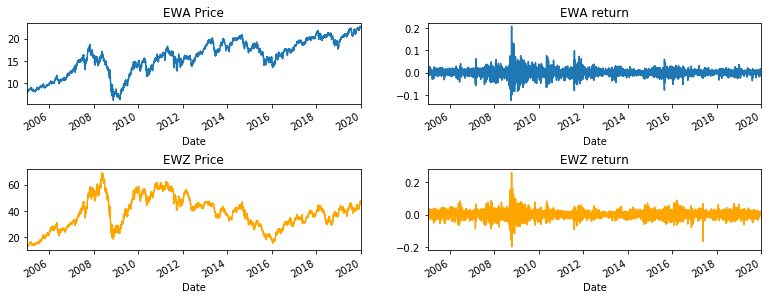

In [102]:
#開始畫圖
plt.subplots_adjust(top=1.5, bottom=0, left=0.3, right=2, hspace=0.8, wspace=0.2)
plt.subplot(3,2,1)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWA Price")
data[tickers[0]].plot()
plt.subplot(3,2,2)
plt.title("EWA return")
returns[tickers[0]].plot()
# color="m"
plt.subplot(3,2,3)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWZ Price")
data[tickers[1]].plot(color="orange")
plt.subplot(3,2,4)
plt.title("EWZ return")
returns[tickers[1]].plot(color="orange")


<b> Return比較

Text(0.5, 1.0, 'Comparison of Portfolio Return')

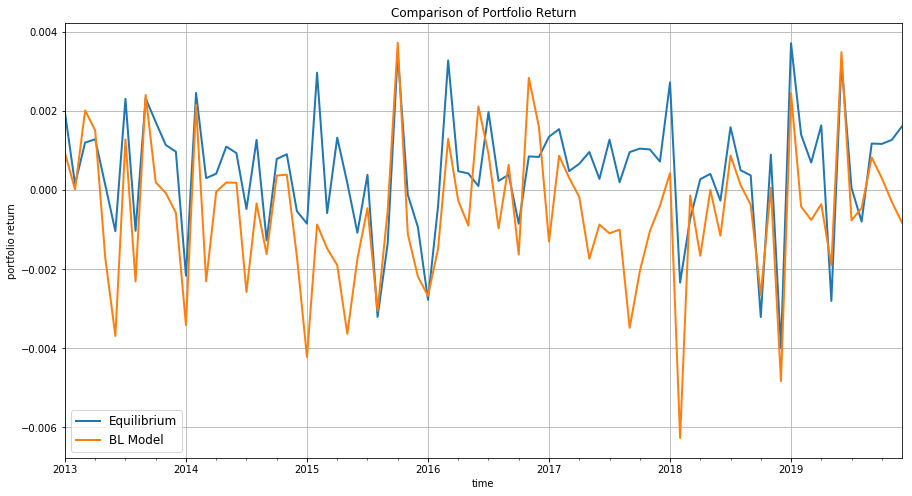

In [103]:
plt.figure(figsize=(15,8))

comparison_ret["Equilibrium"].plot(linewidth=2)
comparison_ret["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio return')
plt.title('Comparison of Portfolio Return')

Text(0.5, 1.0, 'Comparison of Portfolio Volatility')

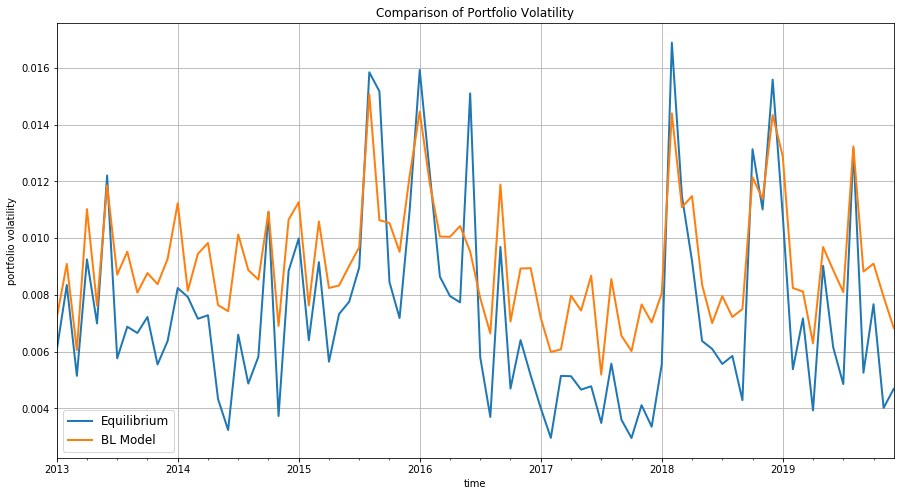

In [104]:
plt.figure(figsize=(15,8))

comparison_vol["Equilibrium"].plot(linewidth=2)
comparison_vol["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Volatility')

Text(0.5, 1.0, 'Comparison of Portfolio Volatility')

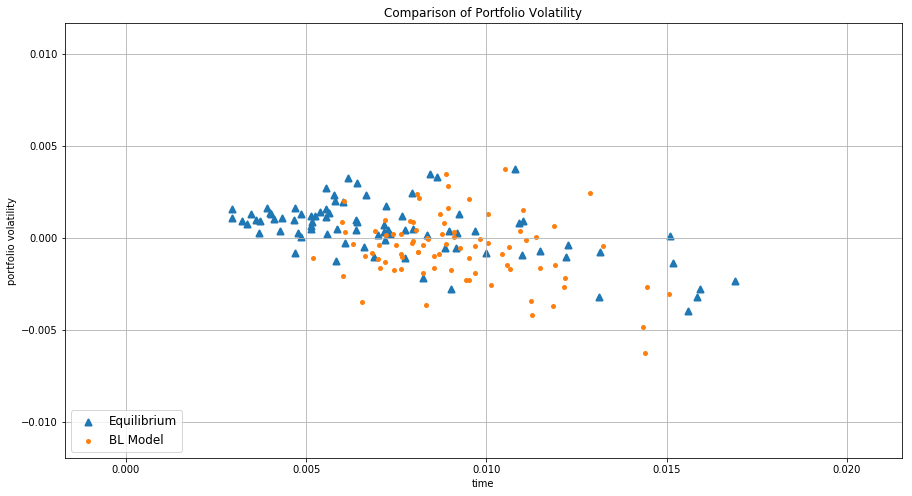

In [105]:
plt.figure(figsize=(15,8))

plt.scatter(comparison_vol["Equilibrium"], comparison_ret["Equilibrium"], label="Equilibrium", linewidth=2,marker='^')
plt.scatter(comparison_vol["BL Model"], comparison_ret["BL Model"], label="BL Model", linewidth=2,marker='.')

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Volatility')